<a href="https://colab.research.google.com/github/EricCallaway/COSC_6315_A04_RNN-LSTM/blob/main/ML_Assignment_04_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import necessary Libraries

In [85]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import nltk
from imblearn.over_sampling import SMOTE
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import re
import string

from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

2. Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)


Mounted at /content/drive


In [65]:
train_csv = '/content/drive/MyDrive/Data/ML_A04_Dataset/SMS_train.csv'
df = pd.read_csv(train_csv, encoding="ISO-8859-1")

In [66]:
print(df.head())

   S. No.                                       Message_body     Label
0       1                         Rofl. Its true to its name  Non-Spam
1       2  The guy did some bitching but I acted like i'd...  Non-Spam
2       3  Pity, * was in mood for that. So...any other s...  Non-Spam
3       4               Will ü b going to esplanade fr home?  Non-Spam
4       5  This is the 2nd time we have tried 2 contact u...      Spam


In [67]:
# calculating length of each record in our df
df['length'] = df['Message_body'].apply(lambda x: len(x))
df.head()

,S. No.,Message_body,Label,length
0,1,Rofl. Its true to its name,Non-Spam,26
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,125
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,57
3,4,Will ü b going to esplanade fr home?,Non-Spam,36
4,5,This is the 2nd time we have tried 2 contact u...,Spam,160


In [86]:
x_df = df.Message_body
y_df = df.Label

Displaying the distribution of data. (Spam vs. Non-Spam)

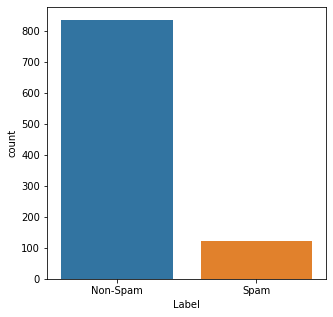

In [87]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Label', data=df)

In [70]:
# some text cleaning functions
def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

3. Clean Text

In [82]:
df['Message_body'] = df['Message_body'].apply(lambda x: convert_to_lower(x))
df['Message_body'] = df['Message_body'].apply(lambda x: remove_numbers(x))
df['Message_body'] = df['Message_body'].apply(lambda x: remove_punctuation(x))
df['Message_body'] = df['Message_body'].apply(lambda x: remove_stopwords(x))
df['Message_body'] = df['Message_body'].apply(lambda x: remove_extra_white_spaces(x))
df['Message_body'] = df['Message_body'].apply(lambda x: lemmatizing(x))

In [83]:
df['length_after_cleaning'] = df['Message_body'].apply(lambda x: len(x))
df.head()

,S. No.,Message_body,Label,length,length_after_cleaning
0,1,rofl true name,Non-Spam,26,14
1,2,guy bitching acted like id interested buying s...,Non-Spam,125,81
2,3,pity mood soany suggestion,Non-Spam,57,26
3,4,ü going esplanade fr home,Non-Spam,36,25
4,5,nd time tried contact u £ pound prize claim ea...,Spam,160,79


In [84]:
# converting string labels to int labels

label_map = {
    'Non-Spam': 0,
    'Spam': 1,
}

df['Label_value'] = df['Label'].map(label_map)
df.head()

,S. No.,Message_body,Label,length,length_after_cleaning,Label_value
0,1,rofl true name,Non-Spam,26,14,0
1,2,guy bitching acted like id interested buying s...,Non-Spam,125,81,0
2,3,pity mood soany suggestion,Non-Spam,57,26,0
3,4,ü going esplanade fr home,Non-Spam,36,25,0
4,5,nd time tried contact u £ pound prize claim ea...,Spam,160,79,1


4. Tokenize Text

In [ ]:
#ENTER TOKENIZATION CODE HERE

5. Vectorize Text

In [88]:
vectorizer = CountVectorizer()
vectorizer.fit(x_df.values.ravel())
x_data=vectorizer.transform(x_df.values.ravel())
x_data=x_data.toarray()


In [ ]:
df['Vectorized'] = 'default value'
cv = CountVectorizer()
for i in range(0,len(df)):
    cv.fit_transform(df['Message_body'])
    df['Vectorized'][i] = cv.vocabulary_

In [113]:
df.Vectorized.head()

0    {'rofl': 1959, 'true': 2447, 'name': 1518, 'gu...
1    {'rofl': 1959, 'true': 2447, 'name': 1518, 'gu...
2    {'rofl': 1959, 'true': 2447, 'name': 1518, 'gu...
3    {'rofl': 1959, 'true': 2447, 'name': 1518, 'gu...
4    {'rofl': 1959, 'true': 2447, 'name': 1518, 'gu...
Name: Vectorized, dtype: object

6. Balance the Dataset

In [115]:
x_data = pd.DataFrame(x_data)
sm = SMOTE(sampling_strategy='minority', random_state=1337)
x_res, y_res = sm.fit_resample(x_data, y_df)

In [116]:
y_res.value_counts()

Non-Spam    835
Spam        835
Name: Label, dtype: int64

Notice here we have now an even dataset, both categories have 835 data points.

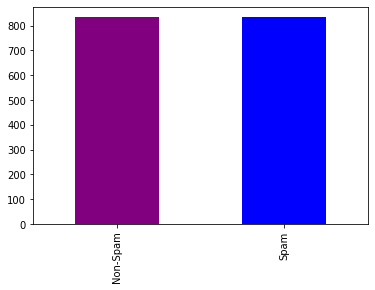

In [123]:
y_res.value_counts().plot(kind='bar', color=['purple', 'blue'])

In [40]:
# !wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2022-07-28 21:11:35--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.81MB/s    in 2m 40s  

2022-07-28 21:14:16 (5.13 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [41]:
# !unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
# words = dict()

# def add_to_dict(d, filename):
#   with open(filename, 'r') as f:
#     for line in f.readlines():
#       line = line.split(' ')

#       try:
#         d[line[0]] = np.array(line[1:], dtype=float)
#       except:
#         continue

# add_to_dict(words, 'glove.6B.50d.txt')
# words

In [43]:
# len(words)

400000

In [44]:
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [45]:
# tokenizer = nltk.RegexpTokenizer(r"\w+")

# tokenizer.tokenize('@user when a father is dysfunctional and is')

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

In [48]:
# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [49]:
# lemmatizer = WordNetLemmatizer()

# lemmatizer.lemmatize('feet')

# def message_to_token_list(s):
#   tokens = tokenizer.tokenize(s)
#   lowercased_tokens = [t.lower() for t in tokens]
#   lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
#   useful_tokens = [t for t in lemmatized_tokens if t in words]

#   return useful_tokens

# message_to_token_list('@user feet a fathers is dysfunctional and is')

['user', 'foot', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

In [50]:
# def message_to_word_vectors(message, word_dict=words):
#   processed_list_of_tokens = message_to_token_list(message)

#   vectors = []

#   for token in processed_list_of_tokens:
#     if token not in word_dict:
#       continue
    
#     token_vector = word_dict[token]
#     vectors.append(token_vector)
  
#   return np.array(vectors, dtype=float)

In [51]:
# message_to_word_vectors('@user when a father is dysfunctional and is').shape

(8, 50)

In [57]:
x_train, x_rem, y_train, y_rem = train_test_split(x_train_df,y_train_df, train_size=0.7, random_state=1337)

# Now since we want the valid  size to be equal (20% of overall data). 
# We take 33.33% of the remaining data and the other 66.67% will be 20 % of the original training set for our validation set.
# So the overal percentaes are training=70%, validation=20%, testing=10%
x_val, x_test, y_val, y_test = train_test_split(x_rem,y_rem, test_size=0.3333, random_state=1337)